In [2]:
#from pyearth import Earth

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
    x1 = np.linspace(0, 2, 20)[0:19]
    x2 = np.linspace(2, 4, 20)[0:19]
    x3 = np.linspace(4, 6, 20)
    y1 = np.sin(np.pi*x1)
    y2 = 4*x2
    y3 = 0.2*x3**2.5 - x3 - 1
    x = np.concatenate([x1, x2, x3])
    # Random seed 2 and normal of 2 crashes on the 5th iteration of pruning after a combination
    #np.random.seed(seed = 26)
    y = np.concatenate([y1, y2, y3]) + np.random.normal(0, 20, 58)

    X_train = pd.DataFrame(x)
    X_test = X_train
    y_train = pd.Series(y)
    y_test = y_train

    start_time = time.time()
    model = Earth(max_degree = 2, enable_pruning = True, allow_subset = True).fit(X_train, y_train)
    print("Time pre predictions: ", time.time()-start_time)
    predictions = model.predict(X_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    print(mean_squared_error(y_train, predictions))


plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x, y, 'o')
plt.plot(x, predictions, 'o')

# Note: October 24th: Tried changing to SKlearn. Gets the same as the matrix multiplication on the 

In [ ]:
from sklearn.model_selection import train_test_split


train = pd.read_csv("/Users/WilliamJamesonPattie_/Desktop/Thesis/Data/train out_prncp_inv.csv")

def dummies_from_objects(x):
    x = x.drop(x.select_dtypes(include=['float', 'int64']).columns, axis=1)
    dummy = pd.DataFrame()
    for var1 in range(0, len(x.columns)):
        dat = pd.get_dummies(x.iloc[:, var1])
        dummy = pd.concat([dummy, dat], axis = 1)
    return dummy

X = train.drop(["id", "money_made_inv"], axis = 1)
y = train.money_made_inv

X_train = X.drop(X.select_dtypes(include=['object']).columns, axis=1)

dropy = ["emp_length", "earliest_cr_line", "last_credit_pull_d", "purpose", "emp_title", 
          "addr_state", "sub_grade", "home_ownership", "verification_status"]
X = pd.concat([X_train, dummies_from_objects(X.drop(dropy, axis=1))], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [ ]:
start_time = time.time()
model = Earth(max_degree=1, enable_pruning = False)
model.fit(X_train, y_train)
print("Time to train ", time.time() - start_time)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print("Time to predict and train ", time.time() - start_time)

print(mean_squared_error(y_train, y_pred_train)**0.5)
print(mean_squared_error(y_test, y_pred)**0.5)

# Plot training data
fig, ax = plt.subplots()
plt.plot(y_pred_train, y_train, 'o')
plt.plot()

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#plt.plot(X_test.loc[:, "out_prncp_inv"], y_test-y_pred, 'o')

In [ ]:
fig, ax = plt.subplots()
plt.plot(y_pred, y_test, 'o')
plt.plot()

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [ ]:
print(model.summary())

# QR Decomposition & Multicolinearity Solutions

In [3]:
import numpy as np

# Your X matrix
X = np.array([[1, 2, 3, 4],
              [1, 2, 5, 8],
              [1, 2, 1, 12],
              [1, 2, 2, 16]])

# Calculate the rank of the X matrix
rank_X = np.linalg.matrix_rank(X)

# Create a lambda matrix to select non-multicollinear columns
lambda_matrix = np.eye(X.shape[1])  # Identity matrix with the same number of columns as X

# Keep only the non-multicollinear columns
X_cleaned = X @ lambda_matrix[:, :rank_X]

print(X_cleaned)

[[1. 2. 3.]
 [1. 2. 5.]
 [1. 2. 1.]
 [1. 2. 2.]]


We want to solve (XtX)^-1 (Xty) = B

But by QR decomposition, X = QR for some invertible matrices. 

Using https://pages.stat.wisc.edu/~larget/math496/qr.html: 
    
X^T X b = X^T y

(QR)^T (QR) b = (QR)^T y

R^T (Q^T Q) R b = R^T Q^T y

R^T R b = R^T Q^T y

(R^T)^{-1} R^T R b = (R^T)^{-1} R^T Q^T y

R b = Q^T y

If we let z = Q^T y,

R b = z


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some example data
A = np.array([[1.0, 2.0, 3.0],
              [1.0, 3.0, 3.0],
              [1.0, 15.0, 3.0],
              [1.0, 5.0, 3.0],
              [1.0, 2.0, 3.0]])

b = np.array([1.0, 2.0, 3.0, 15.0, 1.0])

print(A)

# Calculate the QR decomposition of A
Q, R = np.linalg.qr(A, mode='reduced')

# Solve for the coefficients using the QR decomposition
coefficients = np.linalg.solve(R, np.dot(Q.T, b)) # Solves Ax = B

print("Coefficients:", coefficients)

# Now, calculate the predicted values using the coefficients
# Use the same data matrix A to predict the values
y_pred = np.dot(A, coefficients)

print("Predicted values:", y_pred)

model = sm.OLS(b, A)
results = model.fit()

model2 = LinearRegression().fit(A, b)
print("SKLEARN: ", model2.predict(A))
#print(results.summary())
print("STATS MODEL: ", results.predict(A))
print("It is ok unless there is perfect multi-colinearity")
print("Even near multi-colinearity is ok")

[[ 1.  2.  3.]
 [ 1.  3.  3.]
 [ 1. 15.  3.]
 [ 1.  5.  3.]
 [ 1.  2.  3.]]
Coefficients: [-6.61530340e+15 -3.04449649e-02  2.20510113e+15]
Predicted values: [6. 6. 6. 6. 6.]
SKLEARN:  [4.08580858 4.17821782 5.28712871 4.3630363  4.08580858]
STATS MODEL:  [4.08580858 4.17821782 5.28712871 4.3630363  4.08580858]
It is ok unless there is perfect multi-colinearity
Even near multi-colinearity is ok


In [62]:
# As you get very close to near perfect multicolinearity, np.matrix multiplication breaks down
# and starts getting different answers for some reason

X = np.array([[1, 0, 4,],
 [1, 2, 2,],
 [1, 3, 1,],
 [1, 3, 1,],
 [1, 0, 4,],
 [1, 2, 2,],
 [1, 3, 1,],
 [1, 3, 1,],
 [1, 0, 4,],
 [1, 1, 3,],
 [0.999999999999, 3, 1,],
 [1, 0, 4,],
 [1, 1, 3,],
 [1, 2, 2,],
 [1, 3, 1,],
 [1, 3, 1,]])

y = np.array([[-3.45040616],
 [ 1.17185571],
 [ 4.86379158],
 [ 2.44839373],
 [ 6.58401366],
 [ 2.65853343],
 [ 5.57037082],
 [ 0.71454853],
 [ 6.51919877],
 [ 9.53035654],
 [-2.77709883],
 [-3.91777123],
 [-1.17478271],
 [ 3.84578126],
 [ 4.5144281 ],
 [ 4.2198348 ]])

model = sm.OLS(y, X)
results = model.fit()

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

model2 = LinearRegression().fit(X, y)
prediction2 = model2.predict(X)
#print("SKLEARN: ", prediction2.reshape(prediction2.shape[0],))
#print("SKLEARN: ", model2.coef_)
#print("MSE: ", ((((prediction2 - y)**2).sum()) / y.shape[0]))
#print("MSE: ", mean_squared_error(prediction2, y))

#
#print("STATSMODEL: ", results.summary())
print("BEST ANSWER: ", results.predict(X))

matrix_coef = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
print("COEFFICIENTS FROM MATRIX MULT: ", matrix_coef)
matrix_pred = (matrix_coef.T*X).sum(axis=1)
print("MATRIX PREDICT: ", matrix_pred)
print("MSE: ", (((((matrix_pred.reshape(matrix_pred.shape[0], 1)) - y)**2).sum()) / y.shape[0]) )


X.shape:  (16, 3)
y.shape:  (16, 1)
BEST ANSWER:  [ 1.86132812  3.10693359  3.72924805  3.72924805  1.86132812  3.10693359
  3.72924805  3.72924805  1.86132812  2.48339844 -2.77661133  1.86132812
  2.48339844  3.10693359  3.72924805  3.72924805]
COEFFICIENTS FROM MATRIX MULT:  [[-1608.24689678]
 [  402.83030663]
 [  402.71266587]]
MATRIX PREDICT:  [2.60376669 2.83904821 2.95668897 2.95668897 2.60376669 2.83904821
 2.95668897 2.95668897 2.60376669 2.72140745 2.95668897 2.60376669
 2.72140745 2.83904821 2.95668897 2.95668897]
MSE:  14.273530967112535


# Lots of Linregs

In [ ]:
#https://towardsdatascience.com/numpy-array-processing-with-cython-1250x-faster-a80f8b3caa52
#https://blog.paperspace.com/faster-numpy-array-processing-ndarray-cython/
#https://datastud.dev/posts/ols

In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from statsmodels.regression.linear_model import OLS
import datetime
import copy
import time
from sklearn.linear_model import LinearRegression, SGDRegressor

from numpy.testing import assert_almost_equal
import warnings

for i in range(0, 100):
    gen = np.random.default_rng(20210514)

    # Number of observations
    n = 2000
    # Number of predictors
    m = 100

    # Simulate data

    x = gen.standard_normal((n, m))
    y = gen.standard_normal((n, 1))

    ######################################
    ##### IDEA FOR SPEED IMPROVEMENT #####
    ######################################

    # After calculating the first set of coefficients, the second set is the same thing 
    # with a slightly different formula (adding like 2 numbers). Could combine these into
    # a loop and calculate all of them in (1/n) of the time. That only deals with making coefficients
    # though, while a bigger use of time is the calculating of MSE's
    
    regressor1 = SGDRegressor(max_iter = 1000, 
                     loss = "squared_error",
                     learning_rate = 'invscaling', #"constant"
                     eta0 = 0.01, 
                     #alpha = 0,
                     shuffle = False, 
                     warm_start = True,
                     n_iter_no_change = 5, #Will stop here if doesn't improve in n iterations
                     early_stopping=False)
    regressor2 = SGDRegressor(max_iter = 1000, 
                     loss = "squared_error",
                     learning_rate = 'invscaling', #"constant"
                     eta0 = 0.01, 
                     #alpha = 0,
                     shuffle = False, 
                     warm_start = True,
                     n_iter_no_change = 5, #Will stop here if doesn't improve in n iterations
                     early_stopping=False)
    

    warnings.filterwarnings('ignore')

    #Takes 10 seconds for 40,000 regressions

    coef1 = None
    coef2 = None

    mse_listy = []

    model_residuals = LinearRegression(fit_intercept = True).fit(x, y)
    residuals = y - model_residuals.predict(x)
    tree = DecisionTreeRegressor(max_depth = 1)
    tree.fit(x, residuals)
    print('mse: ', mean_squared_error(residuals, tree.predict(x)))
    print('mse: ', mean_squared_error(y, tree.predict(x).reshape(2000, 1)+model_residuals.predict(x)))
    print(tree.tree_.feature[0])
    print(tree.tree_.threshold[0])
    print("Theoretical max MSE: ", mean_squared_error(residuals, np.zeros((residuals.shape[0], residuals.shape[1],))))


    best_mse = 999
    best_split_val = None

    start = time.time()
    for variable in range(0, 1):
        for split_val in np.unique(x[:, variable]):
            #This takes ~4 seconds
            #x1 = x[x[:, variable] <= split_val, :]
            #y1 = y[x[:, variable] <= split_val, :]
            #x2 = x[x[:, variable] >  split_val, :]
            #y2 = y[x[:, variable] >  split_val, :]

            #This takes ~0.8 seconds for 1 variable
            x1 = copy.deepcopy(x[x[:, variable] <= split_val, :])
            y1 = copy.deepcopy(y[x[:, variable] <= split_val, :])
            x2 = copy.deepcopy(x[x[:, variable] >  split_val, :])
            y2 = copy.deepcopy(y[x[:, variable] >  split_val, :])


            '''
            #Took ~4.5 seconds for 1 variable
            if x1.shape[0] > x1.shape[1]:
                coef1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x1.T, x1)), x1.T), y1)
                y_pred1 = (coef1.T * x1).sum(axis = 1)
                se1 = (y_pred1 - y1.reshape(y_pred1.shape[0]))**2
            else:
                se1 = np.array([0])

            if x2.shape[0] > 0:
                coef2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x2.T, x2)), x2.T), y2)
                y_pred2 = (coef2.T * x2).sum(axis = 1)
                se2 = (y_pred2 - y2.reshape(y_pred2.shape[0]))**2
            else:
                se2 = np.array([0])

            mse = (se1.sum() + se2.sum())/(x1.shape[0] + x2.shape[0])
            '''

            '''
            # Took 223.9 seconds to do one variable with 10 iterations
            if x1.shape[0] <= x1.shape[1]:
                se1 = np.array([0])
            elif type(coef1) == type(None):
                coef1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x1.T, x1)), x1.T), y1)
                y_pred1 = (coef1.T * x1).sum(axis = 1)
                se1 = (y_pred1 - y1.reshape(y_pred1.shape[0]))**2
            else:
                coef1 = gradient_descent(coef1, 0.2, x1, y1, 10)
                y_pred1 = (coef1.T * x1).sum(axis = 1)
                se1 = (y_pred1 - y1.reshape(y_pred1.shape[0]))**2

            if x2.shape[0] <= x2.shape[1]:
                se2 = np.array([0])
            elif type(coef2) == type(None):
                coef2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(x2.T, x2)), x2.T), y2)
                y_pred2 = (coef2.T * x2).sum(axis = 1)
                se2 = (y_pred2 - y2.reshape(y_pred2.shape[0]))**2
            else:
                coef2 = gradient_descent(coef2, 0.2, x2, y2, 10)
                y_pred2 = (coef2.T * x2).sum(axis = 1)
                se2 = (y_pred2 - y2.reshape(y_pred2.shape[0]))**2
            mse = (se1.sum() + se2.sum())/(x1.shape[0] + x2.shape[0])
            '''
            
            # Took 18.8 seconds with 1000 iter, 
            if x1.shape[0] <= x1.shape[1]:
                mse1 = 0
            else:
                regressor1.fit(x1, y1.ravel())
                mse1 = mean_squared_error(y1, regressor1.predict(x1))


            if x2.shape[0] <= x2.shape[1]:
                mse2 = 0
            else:
                regressor2.fit(x2, y2.ravel())
                mse2 = mean_squared_error(y2, regressor2.predict(x2))

            mse_SGD = (mse1*x1.shape[0]+mse2*x2.shape[0])/(x1.shape[0] + x2.shape[0])
            


            '''
            #Took ~11 seconds for 1 variable
            if x1.shape[0] > x1.shape[1]:
                Q, R = np.linalg.qr(x1, mode='reduced')
                coefficients = np.linalg.solve(R, np.dot(Q.T, y1)) # Solves Ax = B
                y_pred1 = (coef1.T * x1).sum(axis = 1)
                se1 = (y_pred1 - y1.reshape(y_pred1.shape[0]))**2

            if x2.shape[0] > x2.shape[1]:
                Q, R = np.linalg.qr(x2, mode='reduced')
                coefficients = np.linalg.solve(R, np.dot(Q.T, y2)) # Solves Ax = B
                y_pred2 = (coef2.T * x2).sum(axis = 1)
                se2 = (y_pred2 - y2.reshape(y_pred2.shape[0]))**2
            else:
                se2 = np.array([0])
            mse = (se1.sum() + se2.sum())/(x1.shape[0] + x2.shape[0])
            '''

            '''
            # Took 64 seconds to do 1 variable. 
            if len(x2) > 0:
                model1_sm = OLS(y1, x1).fit()
                model2_sm = OLS(y2, x2).fit()
                mse1_sm = np.average( (model1_sm.predict(x1).reshape(y1.shape[0], 1) - y1)**2)
                mse2_sm = np.average( (model2_sm.predict(x2).reshape(y2.shape[0], 1) - y2)**2) 
            '''

            # Took ~20 seconds to do 1 variable. 
            '''
            if len(x2) > 0:
                model1 = LinearRegression(fit_intercept = True).fit(x1, y1)
                model2 = LinearRegression(fit_intercept = True).fit(x2, y2)
                y_pred1 = model1.predict(x1)
                y_pred2 = model2.predict(x2)

                se1_sk = (y_pred1 - y1)**2
                se2_sk = (y_pred2 - y2)**2

                #mse1_sk = np.average((model1.predict(x1) - y1)**2)
                #mse2_sk = np.average((model2.predict(x2) - y2)**2)
            mse_sklearn = (se1_sk.sum() + se2_sk.sum())/(x1.shape[0] + x2.shape[0])

            if mse_sklearn < best_mse:
                best_mse = mse_sklearn
                best_split_val = split_val
                best_data = [y_pred1, y_pred2, x1, x2]

            #mse_listy.append(mse_sklearn)
            #print("SGD additional MSE:", mse_SGD-mse_sklearn)

            # Do online learning (takes whole thing instead of batches)
            # chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cs.huji.ac.il/~shais/Advanced2011/Online.pdf
            # Updating QR Factorization: https://eprints.maths.manchester.ac.uk/1192/
            '''

            '''
            try:
                assert_almost_equal(mse, mse_sklearn)
                print(mse)
                print(mse_sklearn)
            except:
                print("Disagreement!")
                print(mse1)
                print(mse1_sk)
                print(mse2)
                print(mse2_sk)
                print('totals')
                print(mse)
                print(mse_sklearn)
                print(x1.shape)
                raise ValueError("Hi")
            '''

        #print(variable, " done")

    #print("Time: ", time.time() - start, " seconds")
    #print("best SKLEARN split val: ", best_split_val)
    #print("best SKLEARN MSE: ", best_mse)

    #SK learn should always be better than decision tree
    #if best_mse > mean_squared_error(residuals, tree.predict(x)):
    #    raise ValueError("Hi")

mse:  1.0537604833922078
mse:  1.0537604833922078
99
1.8868394494056702
Theoretical max MSE:  1.0605059094059526
Time:  22.29582381248474  seconds
best SKLEARN split val:  None
best SKLEARN MSE:  999


ValueError: Hi

In [ ]:
print('mse: ', mean_squared_error(y, tree.predict(x).reshape(2000, 1)+model_residuals.predict(x)))


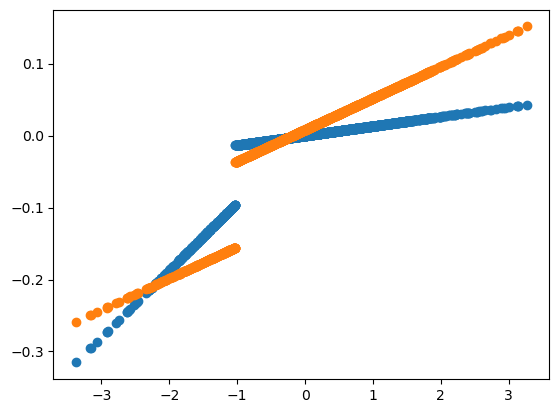

In [299]:
x_sk = np.append(best_data[2], best_data[3])
y_sk = np.append(best_data[0], best_data[1])

#plt.plot(x, y, 'o', color = 'red')
plt.plot(x_sk, y_sk, 'o')
plt.plot(x, tree.predict(x).reshape(2000, 1)+model_residuals.predict(x), 'o')

In [301]:
# Number of observations
n = 2000
# Number of predictors
m = 100

# Simulate data

x = gen.standard_normal((n, m))
y = gen.standard_normal((n, 1))

warnings.filterwarnings('ignore')

#Takes 10 seconds for 40,000 regressions

coef1 = None
coef2 = None

mse_listy = []

model_residuals = LinearRegression(fit_intercept = False).fit(x, y)
residuals = y - model_residuals.predict(x)
tree = DecisionTreeRegressor(max_depth = 1)
tree.fit(x, residuals)
print('mse: ', mean_squared_error(residuals, tree.predict(x)))
print(tree.tree_.feature[0])
print(tree.tree_.threshold[0]) 

mse:  0.9419994797352653
58
-3.8752410411834717


KeyboardInterrupt: 

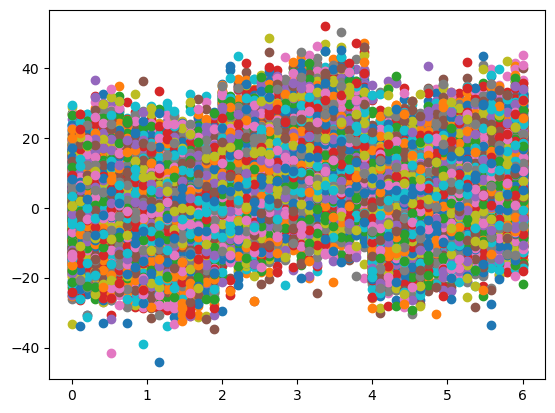

In [537]:
for i in range(0, 1000):
    x1 = np.linspace(0, 2, 20)[0:19]
    x2 = np.linspace(2, 4, 20)[0:19]
    x3 = np.linspace(4, 6, 20)
    y1 = np.sin(np.pi*x1)
    y2 = 4*x2
    y3 = 0.2*x3**2.5 - x3 - 1
    x = np.concatenate([x1, x2, x3])
    # Random seed 2 and normal of 2 crashes on the 5th iteration of pruning after a combination
    #np.random.seed(seed = 26)
    x = x.reshape(-1, 1)
    y = np.concatenate([y1, y2, y3]) + np.random.normal(0, 10, 58)

    plt.plot(x, y, 'o')

    model_residuals = LinearRegression(fit_intercept = True).fit(x, y)
    residuals = y - model_residuals.predict(x)
    tree = DecisionTreeRegressor(max_depth = 1)
    tree.fit(x, residuals)
    #print('tree feature: ', tree.tree_.feature[0])
    #print('tree split value: ', tree.tree_.threshold[0])
    #print('tree mse: ', mean_squared_error(residuals, tree.predict(x)))



    best_mse = 999
    best_split_val = None
    for variable in range(0, 1):
        for split_val in np.unique(x[:, variable]):
            #This takes ~0.8 seconds for 1 variable
            x1 = copy.deepcopy(x[x[:, variable] <= split_val])
            y1 = copy.deepcopy(y[x[:, variable] <= split_val])
            x2 = copy.deepcopy(x[x[:, variable] >  split_val])
            y2 = copy.deepcopy(y[x[:, variable] >  split_val])

            # Took ~20 seconds to do 1 variable. 

            if len(x2) > 0:
                model1 = LinearRegression(fit_intercept = True).fit(x1, y1)
                model2 = LinearRegression(fit_intercept = True).fit(x2, y2)
                y_pred1 = model1.predict(x1)
                y_pred2 = model2.predict(x2)

                se1_sk = (y_pred1 - y1)**2
                se2_sk = (y_pred2 - y2)**2

                #mse1_sk = np.average((model1.predict(x1) - y1)**2)
                #mse2_sk = np.average((model2.predict(x2) - y2)**2)
            mse_sklearn = (se1_sk.sum() + se2_sk.sum())/(x1.shape[0] + x2.shape[0])

            if mse_sklearn < best_mse:
                best_mse = mse_sklearn
                best_split_val = split_val
                best_data = [y_pred1, y_pred2, x1, x2]

    #print(best_split_val)
    #print("best SKLEARN MSE: ", best_mse)
    if best_mse > mean_squared_error(residuals, tree.predict(x)):
        raise ValueError('hi')

# Why is the decision tree accuracy sometimes better than the lin reg one? Wouldn't the lin reg see that option and then just do better?

In [518]:
variable = 0
split_val = 5.894736842105263

x1 = copy.deepcopy(x[x[:, variable] <= split_val])
y1 = copy.deepcopy(y[x[:, variable] <= split_val])
x2 = copy.deepcopy(x[x[:, variable] >  split_val])
y2 = copy.deepcopy(y[x[:, variable] >  split_val])

# Took ~20 seconds to do 1 variable. 

if len(x2) > 0:
    model1 = LinearRegression(fit_intercept = True).fit(x1, y1)
    model2 = LinearRegression(fit_intercept = True).fit(x2, y2)
    y_pred1 = model1.predict(x1)
    y_pred2 = model2.predict(x2)

    se1_sk = (y_pred1 - y1)**2
    se2_sk = (y_pred2 - y2)**2

    #mse1_sk = np.average((model1.predict(x1) - y1)**2)
    #mse2_sk = np.average((model2.predict(x2) - y2)**2)
mse_sklearn = (se1_sk.sum() + se2_sk.sum())/(x1.shape[0] + x2.shape[0])


print(mse_sklearn)
print(mean_squared_error(y, np.append(y_pred1, y_pred2)))
if mse_sklearn < best_mse:
    best_mse = mse_sklearn
    best_split_val = split_val
    best_data = [y_pred1, y_pred2, x1, x2]

101.36545397234065
101.36545397234065


In [510]:
y_pred2

array([34.8318959])

In [509]:
print(mean_squared_error(y, np.append(y_pred1, y_pred2)))

102.54777345311827


In [512]:
tree.predict(x).reshape(58, )+model_residuals.predict(x)

array([-1.18227149e+00, -9.85266728e-01, -7.88261969e-01, -5.91257210e-01,
       -3.94252450e-01, -1.97247691e-01, -2.42931693e-04,  1.96761828e-01,
        3.93766587e-01,  5.90771346e-01,  7.87776106e-01,  9.84780865e-01,
        1.18178562e+00,  1.37879038e+00,  1.57579514e+00,  1.77279990e+00,
        1.96980466e+00,  2.16680942e+00,  2.36381418e+00,  2.56081894e+00,
        2.75782370e+00,  2.95482846e+00,  3.15183322e+00,  3.34883798e+00,
        3.54584274e+00,  3.74284750e+00,  3.93985225e+00,  4.13685701e+00,
        4.33386177e+00,  4.53086653e+00,  4.72787129e+00,  4.92487605e+00,
        5.12188081e+00,  5.31888557e+00,  5.51589033e+00,  5.71289509e+00,
        5.90989985e+00,  6.10690461e+00,  6.30390937e+00,  6.50091413e+00,
        6.69791888e+00,  6.89492364e+00,  7.09192840e+00,  7.28893316e+00,
        7.48593792e+00,  7.68294268e+00,  7.87994744e+00,  8.07695220e+00,
        8.27395696e+00,  8.47096172e+00,  8.66796648e+00,  8.86497124e+00,
        9.06197600e+00,  

In [498]:
print('mse: ', mean_squared_error(y, tree.predict(x).reshape(58, )+model_residuals.predict(x)))


mse:  101.69320844280395


In [502]:
tree.predict(x).reshape(58, )+model_residuals.predict(x)

(58,)

In [ ]:
print(mean_squared_error(y, np.append(y_pred1, y_pred2)))

In [480]:
tree.predict(x)

array([-1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, -1.18227149, -1.18227149, -1.18227149,
       -1.18227149, -1.18227149, 23.60262462])

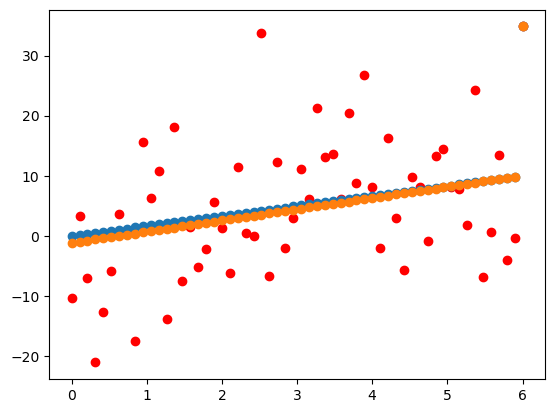

In [459]:
x_sk = np.append(best_data[2], best_data[3])
y_sk = np.append(best_data[0], best_data[1])

plt.plot(x, y, 'o', color = 'red')
plt.plot(x_sk, y_sk, 'o')
plt.plot(x, tree.predict(x).reshape(58, )+model_residuals.predict(x), 'o')

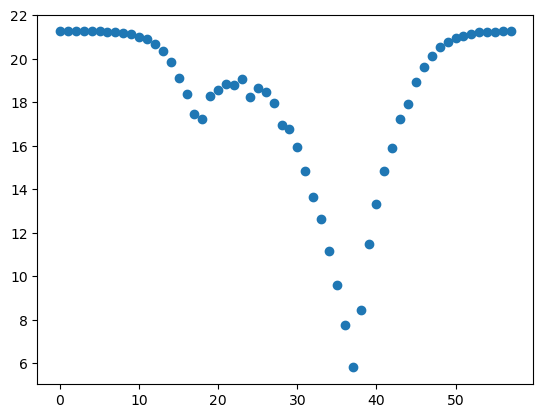

In [46]:
x1 = np.linspace(0, 2, 20)[0:19]
x2 = np.linspace(2, 4, 20)[0:19]
x3 = np.linspace(4, 6, 20)
y1 = np.sin(np.pi*x1)
y2 = 4*x2
y3 = 0.2*x3**2.5 - x3 - 1


x = np.concatenate([x1, x2, x3]).reshape(x.shape[0], 1)

x2_real = np.linspace(0, 6, 58).reshape(x2_real.shape[0], 1)
np.random.shuffle(x2_real)
x_true = np.concatenate([x, x2_real], axis = 1)

np.random.seed(seed = 3)
y = np.concatenate([y1, y2, y3]) + np.random.normal(0, 0.1, 58)
y=y.reshape(y.shape[0], 1)

mse_listy = []

variable = 0
for split_val in np.unique(x_true[:, variable]):

    x1 = copy.deepcopy(x_true[x_true[:, variable] <= split_val, :])
    y1 = copy.deepcopy(y[x_true[:, variable] <= split_val, :])
    x2 = copy.deepcopy(x_true[x_true[:, variable] >  split_val, :])
    y2 = copy.deepcopy(y[x_true[:, variable] >  split_val, :])
    if len(x2) > 0:


        model1 = LinearRegression(fit_intercept = False).fit(x1, y1)
        model2 = LinearRegression(fit_intercept = False).fit(x2, y2)
        y_pred1 = model1.predict(x1)
        y_pred2 = model2.predict(x2)

        se1_sk = (y_pred1 - y1)**2
        se2_sk = (y_pred2 - y2)**2


    mse_sklearn = (se1_sk.sum() + se2_sk.sum())/(x1.shape[0] + x2.shape[0])

    mse_listy.append(mse_sklearn)
    
plt.plot(mse_listy, 'o')

In [537]:
import time

In [524]:
zeros_time = 0
pred_time = 0
update_time = 0


def gradient_descent(start_coefs, learning_rate, x, y, iterations):
    # while (error keeps improving a lot):
    #global zeros_time
    #global pred_time
    #global update_time
    y_pred = (start_coefs.T*x).sum(axis = 1)
    #print("starting error: ", ((y_pred - y.reshape(y_pred.shape[0]))**2).sum() / y.shape[0])
    for iters in range(iterations):
        #time1 = time.time()
        B_gradient = np.zeros( (start_coefs.shape[0], ) )
        #zeros_time = zeros_time + time.time() - time1
        #time2 = time.time()
        for i in range(0, len(x)):
            #print(((-2)*x[i].T*(y[i]-y_pred[i])).shape)
            B_gradient = B_gradient + ((-2)*x[i].T*(y[i]-y_pred[i])) #.reshape(start_coefs.shape[0], start_coefs.shape[1])
        
        #update_time = update_time + time.time() - time2
        
        #time3 = time.time()
        start_coefs = start_coefs - learning_rate*(B_gradient.reshape(start_coefs.shape[0], start_coefs.shape[1])/len(x))
        
        y_pred = (start_coefs.T*x).sum(axis = 1)
        #pred_time = pred_time + time.time() - time3
    
    #print("final error: ", ((y_pred - y.reshape(y_pred.shape[0]))**2).sum() / y.shape[0])
    return start_coefs
gradient_descent(coef1, 0.2, x1, y1, 1000)

print("zeros_time: ", zeros_time)
print("pred_time: ", pred_time)
print("update_time: ", update_time)

model = LinearRegression(fit_intercept = False).fit(x1, y1)
y_pred = model.predict(x1)
se1_sk = (y_pred - y1)**2
mse1_sk = np.average((model.predict(x1) - y1)**2)
print('model error: ', mse1_sk)


zeros_time:  0
pred_time:  0
update_time:  0
model error:  0.9080320475082689


In [ ]:
import numpy as np
x = np.array([0, 1, 4, 3, 6, 5, 2, 9, 8, 7], dtype=np.float64)
np.argsort(x)[::-1]

In [ ]:

x = np.array([0, 0, 1, 0, 0])
# Returns the order each element should go in if it were sorted
# So we get 0 1 3 4 2 because the 0th element goes first, the 1st element goes second, 
# the 2nd element goes last, etc. 
np.argsort(x)